# [Natural Language Processing](https://www.deeplearning.ai/resources/natural-language-processing/)

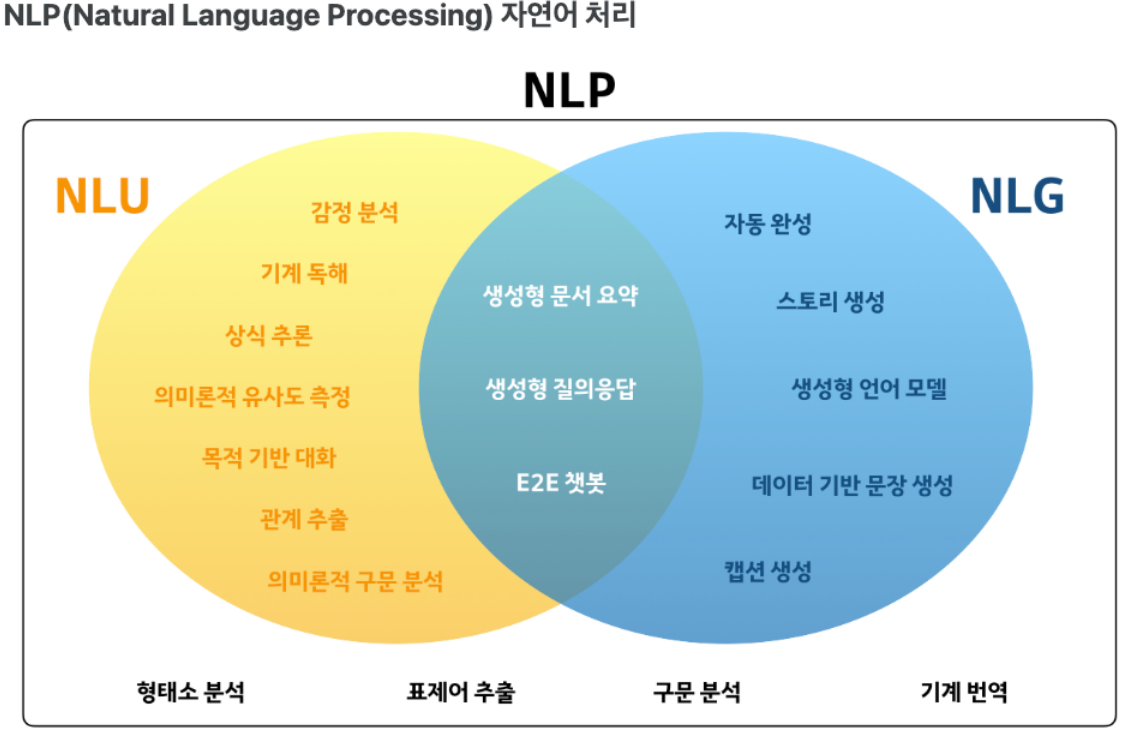

## 자연어 처리 과정

- NLU(Natural Language Understanding)
> 자연어 이해; 자연어 형태의 문장을 이해하는 기술
> 예) 구글에서 NLU 기술을 접목해 기존 키워드 매칭 방식과 비교해 더 나은 검색 서비스를 제공함

- NLG(Natural Language Generation)
> 자연어 생성: 자연어 문장을 생성하는 기술
> 예) 자동 완성, 스토리 생성

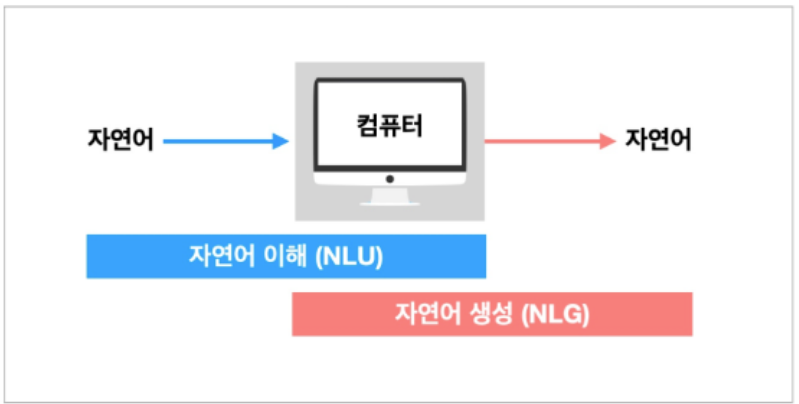

## 자연어 처리 응용

> 이메일 필터링(Email filtering), 언어 번역(Language translation), 스마트 비서(Smart assistants), 문서 분석(Document analysis), 온라인 검색(Online searches), 예측 텍스트(Predictive text), 자동 요약(Automatic summarization), 감정 분석(Sentiment analysis), 챗봇(Chatbots), 소셜 미디어 모니터링(Social media monitoring)

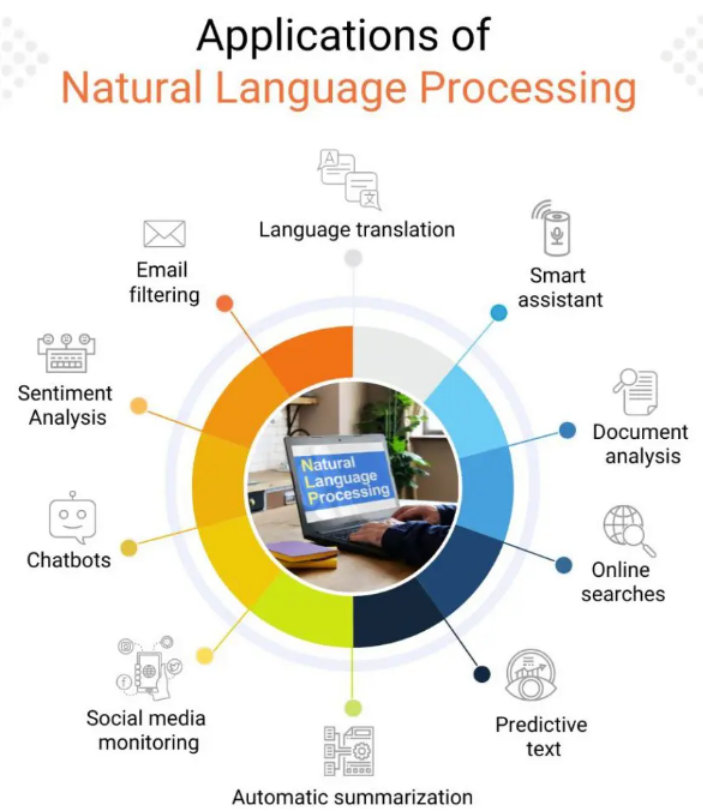

# 텍스트 표현
> 신경망으로 자연어 처리(NLP) 작업을 해결하려면 텍스트를 텐서로 표현하는 방법이 필요합니다. 컴퓨터는 이미 텍스트 문자를 ASCII(아스키 코드) 또는 UTF-8과 같은 인코딩을 사용하여 화면의 글꼴에 메핑되는 숫자로 나타내고 있습니다.

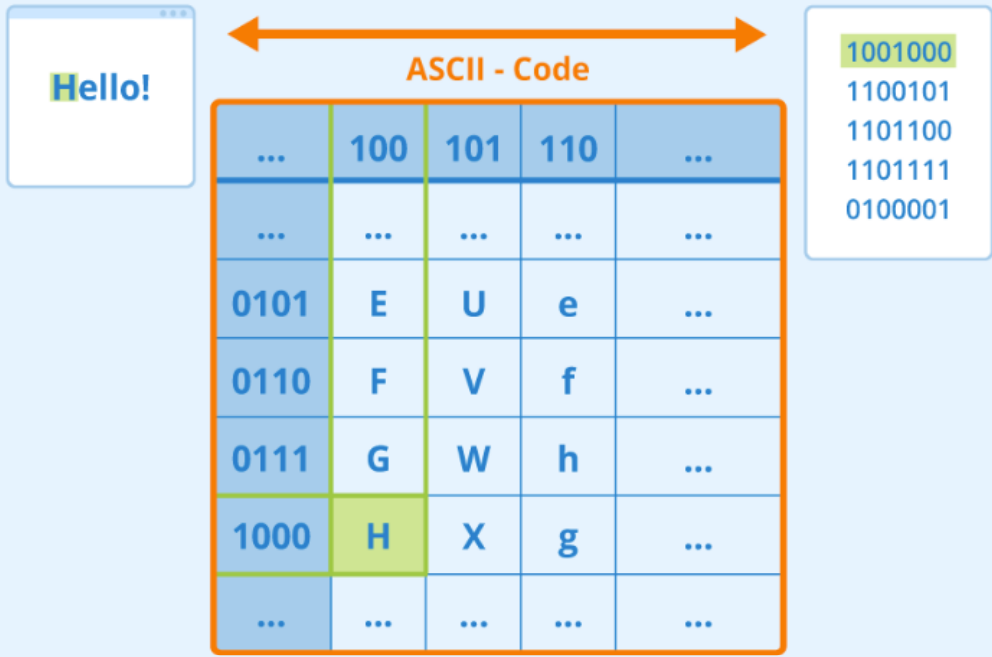

## 비트와 바이트

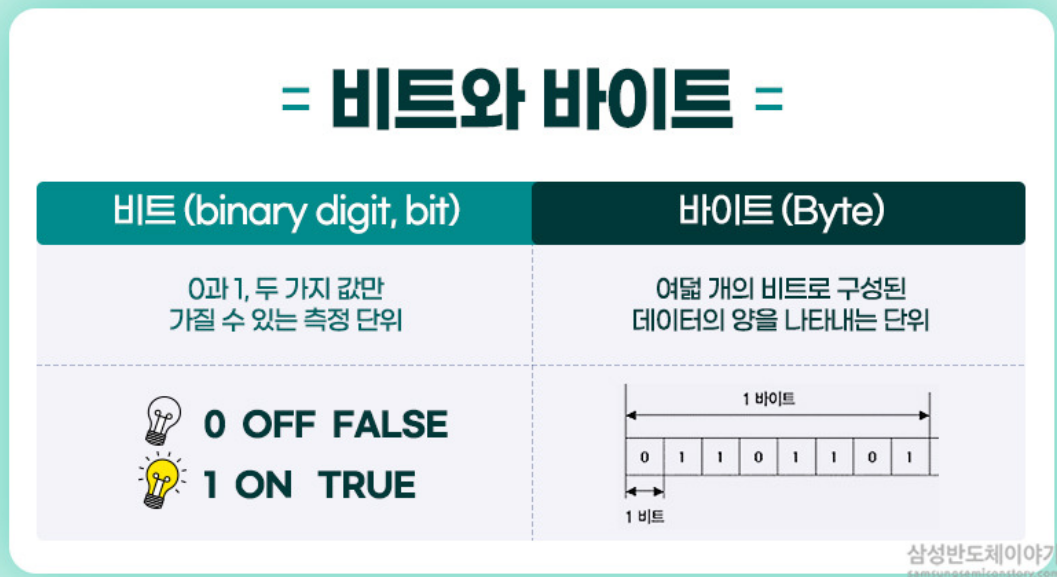

## 인코딩과 디코딩

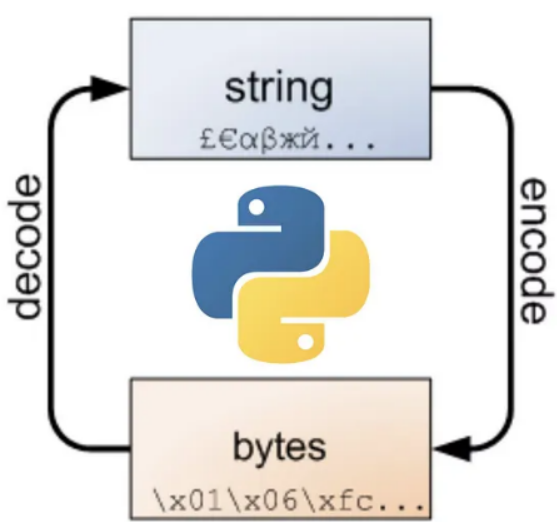

### 인코딩
> 문자열을 바이트코드로 변환

파이썬에서 문자열은 유니코드로 처리합니다. 따라서 인코딩한다는 의미는 유니코드를 `utf-8`, `euc-kr`, `ascii` 형식의 `byte 코드`로 변환하는 것을 의미합니다.

In [1]:
str = '한글'

In [2]:
type(str)

str

In [3]:
encoded = str.encode('utf-8')
encoded

b'\xed\x95\x9c\xea\xb8\x80'

In [4]:
type(encoded)

bytes

In [5]:
encoded = str.encode('euc-kr')
encoded

b'\xc7\xd1\xb1\xdb'

### 디코딩
> 바이트 코드를 문자열로 변환

파이썬에서 디코딩한다는 것은 byte 코드를 유니코드로 변환한다는 것을 뜻합니다.

In [6]:
str = b'\xc7\xd1\xb1\xdb'

decoded = str.decode('euc-kr')
decoded

'한글'

In [7]:
str = b'\xed\x95\x9c\xea\xb8\x80'

decoded = str.decode('utf-8')
decoded

'한글'

In [8]:
str = b'\xed\x95\x9c\xea\xb8\x80'

decoded = str.decode('euc-kr')
decoded

UnicodeDecodeError: ignored

## 유니코드 정규화(Unicode Normalization)

### [ASCII(아스키 코드)](https://namu.wiki/w/%EC%95%84%EC%8A%A4%ED%82%A4%20%EC%BD%94%EB%93%9C?from=ASCII)

- 가장 처음 만들어진 인코딩이 ASCII 코드이다.
- 128개의 문자조합을 제공하는 7비트(1비트는 통신 에러 검출용) 부호
- 알파벳, 숫자, 특수기호 그외 컴퓨터에 필요한 몇 가지만이 정의되어 있어서 점차 여러 나라에서 컴퓨터를 사용하게 되고 통신이 발달하다보니 기존의 아스키 인코딩보다 더 많은 문자들을 정의한 새로운 인코딩이 필요해짐

### [Unicode(유니 코드)](https://namu.wiki/w/%EC%9C%A0%EB%8B%88%EC%BD%94%EB%93%9C)

- 각 나라별 언어를 모두 표현하기 위해 나온 코드 체계가 유니코드
- 사용중인 운영체제, 프로그램, 언어에 관계 없이 문자마다 고유한 코드 값을 제공하는 새로운 개념의 코드
- UTF-8 (가변길이 인코딩):
utf-8은 가장 많이 사용되는 가변 길이 유니코드 인코딩이다.

In [9]:
# ord()를 통해 문자를 아스키 코드로 변환할 수 있다.
ord('한')

54620

In [10]:
# chr()를 통해 아스키 코드를 문자로 변환할 수 있다.
chr(54620)

'한'

### unicodedata

파이썬으로 텍스트 전처리를 하다가 정규식으로 한글 영어만 추출할 때, 가끔 데이터가 None이 되는 경우가 많이 발생한다.
그런 경우에는 대부분 같은 문자이지만 `아스키 코드가 달라서` 발생하는 문제들이다.

이런 이슈(오류)들을 피하기 위해서 유니코드 정규화를 해야 한다.

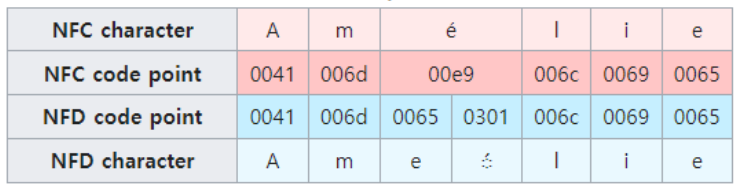

In [11]:
import unicodedata

- NFC(Normal From Composed):
구성된 문자 반환

In [12]:
unicodedata.normalize('NFC', 'Hello')

'Hello'

In [17]:
unicodedata.normalize('NFC', 'Wir sehen Sie später.')

'Wir sehen Sie später.'

In [16]:
unicodedata.normalize('NFC', 'Wir sehen Sie später.').encode('utf-8')

b'Wir sehen Sie sp\xc3\xa4ter.'

In [18]:
b'\xc3\xa4'.decode('utf-8')

'ä'

- NFD(Normal Form Decomposed):
분해, 결합된 문자 제공

In [13]:
unicodedata.normalize('NFD', 'Hello')

'Hello'

In [15]:
unicodedata.normalize('NFD', 'Wir sehen Sie später.')

'Wir sehen Sie später.'

In [19]:
unicodedata.normalize('NFD', 'Wir sehen Sie später.').encode('utf-8')

b'Wir sehen Sie spa\xcc\x88ter.'

In [22]:
b'a, \xcc\x88'.decode('utf-8')

'a, ̈'

`unicodedata.category(chr)`:
> chr 문자에 할당된 일반 범주(general category)를 문자열로 반환합니다.
> - `Mn`: Mark, no spacing(발음구별기호)
> - `LI`: Letter, lower case
> - `Lu`: Letter, upper case

In [ ]:
unicodedata.category('c')

In [ ]:
unicodedata.category('C')

# 텍스트 전처리(Text Preprocessing)

## Cleaning(정제)

- 대문자 vs 소문자 처리
아래는 대문자 vs 소문자 처리 방법에 대한 예시이다. 이렇게 뜻이 같은 경우에는 대문자를 소문자로 변경하는 것이 맞지만, 다르다면 변경하지 말아야 한다.

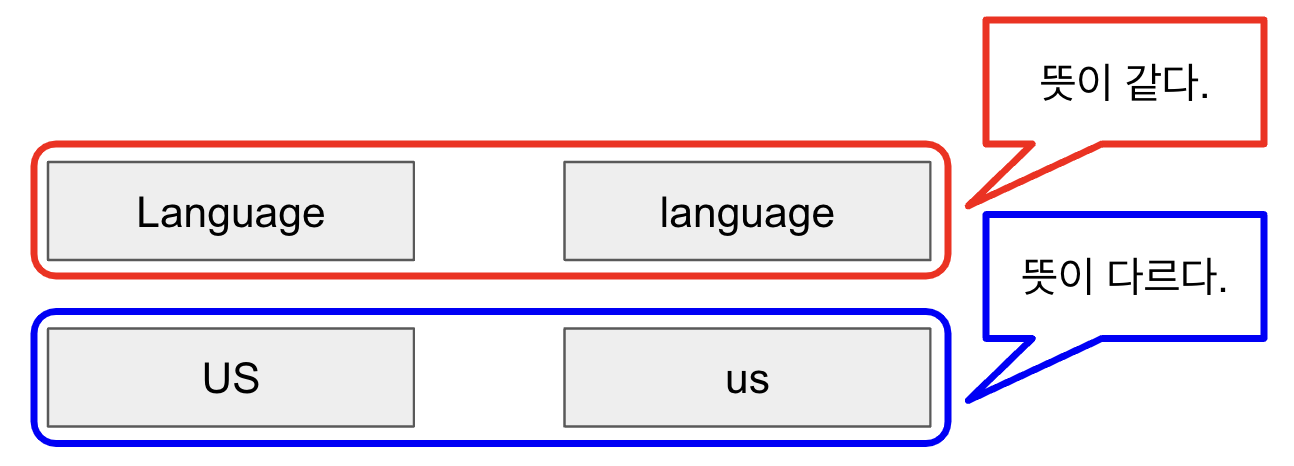

- 출현 횟수가 적은 단어의 제거
  - animals(동물) vs faunas(동물군)에서 와 같이 사용횟수가 적은 단어들을 제거한다.
  - 다만, 이때도 출현 횟수가 적지만, 중요한 단어인 경우에는 제거를 하면 안된다.

- 데이터 사용 목적에 맞추어 노이즈를 제거
  - 관사, 대명사 등 의미를 부여할 수 없는 글자들을 제거한다.

## Stemming(추출)

### 어간 추출
- 어간(Stem): 단어의 의미를 담은 핵심
- 접사(Affix): 단어에 추가 용법을 부여

예제)
> - playing -> play(어간) + ing(접사)
> - lectures -> lecture(어간) + s(접사)
> - kindness -> kind(어간) + ness(접사)

### 표제어 추출
표제어(lemmatization)는 문장에서 단어의 원형을 추출하는 과정입니다.

예시)
> - is, are -> be
> - having -> have

### 어간 추출 vs 표제어 추출
- 표제어 추출은 단어의 품사 정보를 포함하고 있음
- 어간 추출은 품사 정보를 갖고 있지 않음

예시1)
> - having -> hav(어간 추출) / have(표제어 추출)
> - is -> is(어간 추출) / be(표제어 추출)

예시2)
> - bear는 명사일 때는, '곰'이라는 뜻으로 사용하지만, 동사일 때는, '견디다'와 같이 다른 뜻으로 사용될 수 있습니다.
> - 이렇게 품사에 따라 뜻이 달라지는 단어들은 표제어 추출을 하여야 합니다.

## Stopword(불용어)
- 갖고 있는 데이터에서 유의미한 단어 토큰만을 선별하기 위해서는 큰 의미가 없는 단어 토큰을 제거하는 작업이 필요합니다.
- 여기서 큰 의미가 없다라는 것은 자주 등장하지만 분석을 하는 것에 있어서는 큰 도움이 되지 않는 단어들을 말합니다.

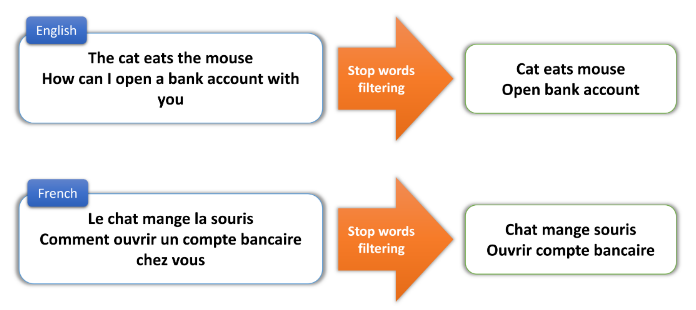

## Tokenization(토큰화)
- 주어진 문장에서 "의미 부여"가 가능한 단위를 찾습니다.
- 토큰화는 형태소 분석기를 이용하여 진행됩니다. 다만, 각 형태소 분석기마다 토큰화를 하는 방식이 다르기 때문에 사용하는 데이터(또는 목젝어)에 맞는 형태소 분석기를 찾아서 사용해야 합니다.

### Token(토큰)

우리는 각 문자가 무엇을 나타내는지 , 그리고 모든 문자가 어떻게 모여 문장의 단어를 형성하는지 이해합니다. 그러나 컴퓨터 자체로는 그러한 이해가 없으며 신경망은 훈련 중에 의미를 학습해야 합니다.

따라서 텍스트를 표현할 때 다양한 접근 방식을 사용할 수 있습니다.

- 문자(글자) 수준 표현(Character-level representation)
> 예) "토끼 안녕"은 "토", "끼", "안", "녕"으로 구분할 수 있다.
- 단어 수준 표현(Word-level representation)
> 예) "토끼 안녕"은 "토끼", "안녕"으로 구분할 수 있다.

이러한 접근 방식을 통합하기 위해 일반적으로 텍스트의 원자 조각을 `토큰`이라고 합니다. 이렇게 텍스트를 일련의 `토큰`으로 변환하는 프로세스를 토큰화라고 합니다.
다음으로 각 토큰을 신경망에 공급할 수 있는 숫자에 할당해야 합니다. 이를 `벡터화`라고 하며, 일반적으로 토큰 어휘를 구축하여 수행됩니다. 이런 `벡터화`의 과정을 `Word Embedding`이라고 한다.

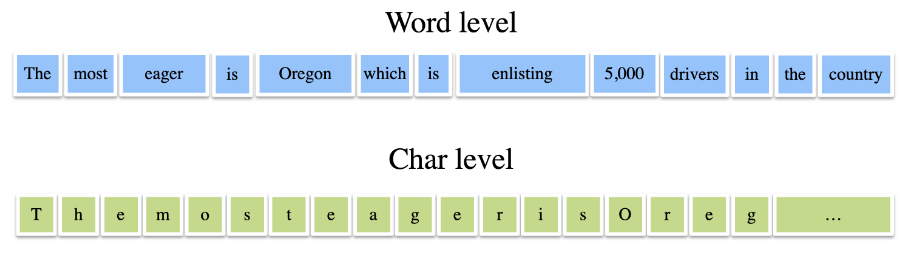

### [형태소 분석](https://ko.wikipedia.org/wiki/%ED%98%95%ED%83%9C%EC%86%8C)
형태소(morpheme)는 언어학에서 (일반적인 정의를 따르면) 일정한 의미가 있는 가장 작은 말의 단위로 발화체 내에서 따로 떠어낼 수 있는 것을 말한다.
즉, 더 분석하면 뜻이 없어지는 말의 단위이다.


예) 한나가 책을 보았다.

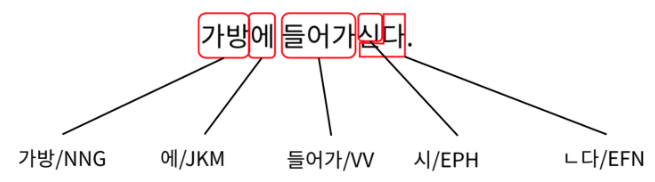

형태소의 의미/기능으로 구분

- 실질형태소
  > 어휘적 의미가 있는 형태소로 어떤 대상이나 상태, 동작을 가리키는 형태소를 말한다. 일반적으로 명사, 동사, 형용사, 부사가 이에 속한다.
  > 위의 예에서는 "한나", "책", "보"가 이에 해당한다.
- 형식형태소
  > 문법적 의미가 있는 형태소로 어휘형태소와 함께 스여 그들 사이의 관계를 나타내는 기능을 하는 행태소를 말한다. 한국어에서는 조사, 어미가 이에 속한다.
  > 위의 예에서는 "가", "을", "았", "다"가 이에 해당한다.

형태소의 의존성으로 구분

- 자립형태소
    > 다른 형태소 없이 홀로 어절을 이루어 사용될 수 있는 형태소를 말한다. 한국어에서는 일반적으로 명사, 대명사, 수사, 관형사, 부사, 감탄사 등이 이에 속한다.
    > 위의 예에서는 "한나", "책"가 이에 해당한다.
- 의존형태소
    > 문장에서 반드시 다른 형태소와 함께 쓰여서 어절을 이루는 형태소를 말한다. 한국어에서는 조사와 어미는 물론 이에 속하고 용언의 어간 즉 동사, 형용사의 어간이 이에 속한다.
    > 위의 예에서는 "가", "을", "보", "았", "다"가 이에 해당한다.

### Vocabulary(어휘집)
> 중복을 제거한 어휘와 index가 정의된 집합이다. 어휘집을 통해 문자를 숫자로 변환할 수 있다.

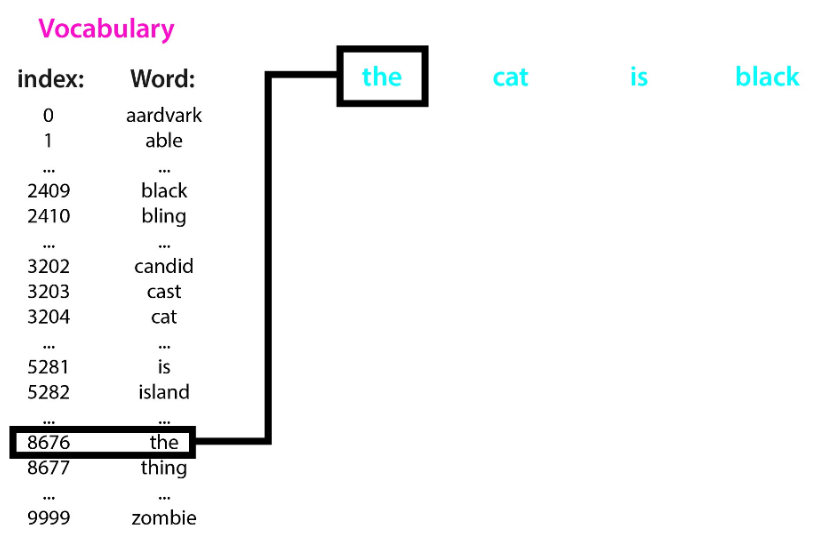

## Embedding / Sorting
- Encoding: 문자를 숫자로 처리하는 과정
- Sorting: 자주/중요한 문자를 작은 숫자로 정의하는 과정

Encoding 단점
- Out of vocabulary words (OOV) 문제:
사전에 포함되어 있는 단어만 처리할 수 있습니다.
- 단어의 순서 정보 손실

### 정수 인코딩 (Integer-Encoding)
- 정수 인코딩(Integer Encoding)은 자연어 처리에서 텍스트를 숫자로 변환하는 과정 중 하나입니다. 이를 통해 컴퓨터가 텍스트를 이해하고 처리할 수 있게 됩니다.

Bag of Words - BOW
> Bag of Words는 문서가 가지는 모든 단어(Words)를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 방법이다.

Count Encoding
> 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩 벡터를 만든다.

예시) doc=["One Cent, Two Cents, Old Cent, New Cent: All About Money"]

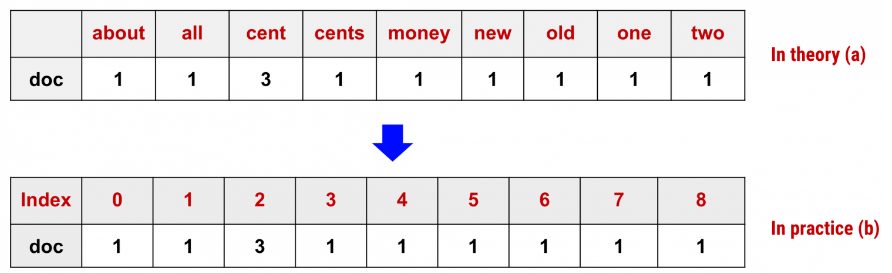

TF-IDF Ecoding
> TF-IDF(Term Frequency - Inverse Document Frequency) 인코딩은 단어를 갯수 그대로 카운트하지 않고 모든 문서에 공통적으로 들어있는 단어의 경우 문서 구별 능력이 떨어진다고 보아 가중치를 축소하는 방법이다.

구체적으로는 문서 d(document)와 단어 t에 대해 다음과 같이 계산한다.

tf-idf(d,t) = tf(d,t) * idf(t)

- tf(d,t): term frequency. 특정한 단어의 빈도수
- idf(t): inverse document frequency. 특정한 단어가 들어 있는 문서의 수에 반비례하는 수
$$
idf(d,t) = log{ n \over 1 + df(t) }
$$
- n: 전체 문서의 수
- df(t): 단어 t를 가진 문서의 수

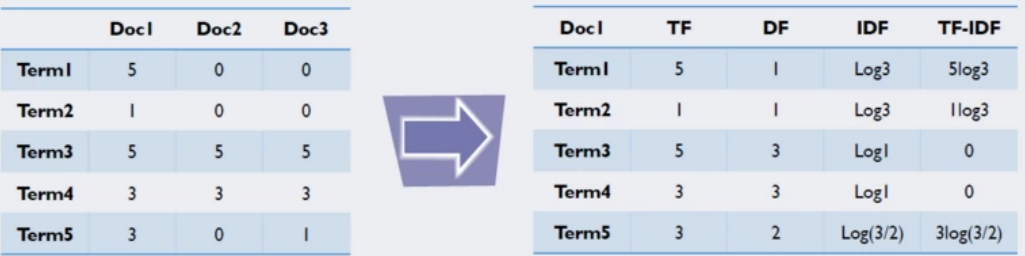

### 원-핫 인코딩(One-Hot Encoding)
- 원-핫 인코딩을 통해서 나온 원-핫 벡터들은 표현하고자 하는 단어의 인덱스의 값만 1이고, 나머지 인덱스에는 전부 0으로 표현되는 벡터 표현 방법입니다.
- 다만, 이렇게 벡터 또는 행렬(matrix)의 값이 대부분이 0으로 표현되는 방법을 희소 표현(sparse representation)이라고 합니다. 원-핫 벡터는 희소 벡터(sparse vector)입니다.

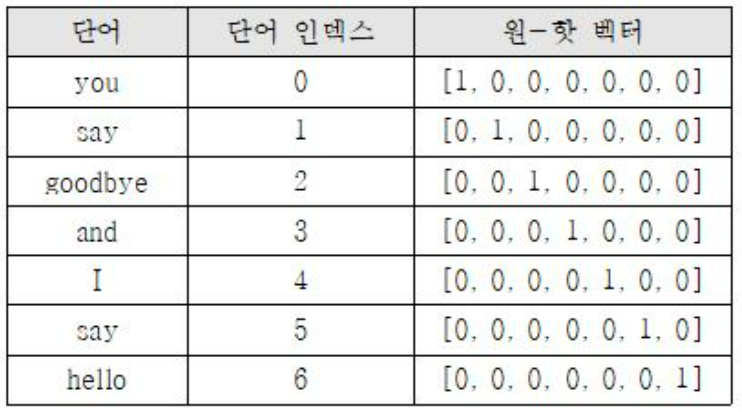

### Word2vec Ecoding
- 분산 가설(Distributed hypothesis)
>분산 가설(Distributed hypothesis)은 같은 문맥의 단어, 즉 '비슷한 위치에 나오는 단어는 비슷한 의미를 가진다' 라는 의미이다.
따라서 어떤 글의 비슷한 위치에 존해하는 단어는 단어 간의 유사도를 높게 측정할 것이다.

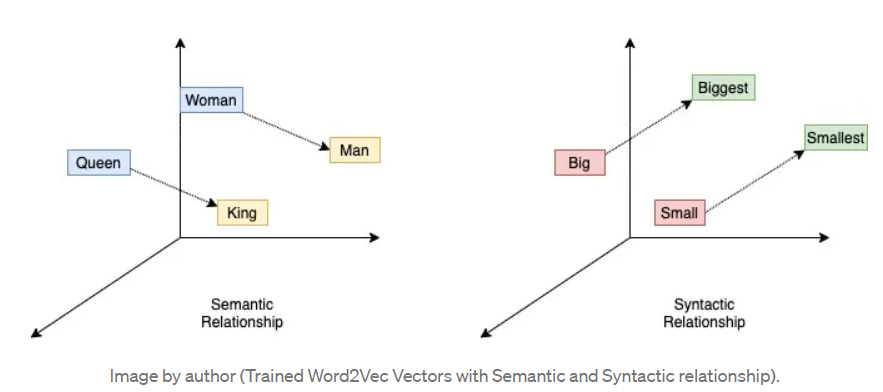

기존 인코딩들 단점
- 기존 정수 인코딩 (Integer Encoding)의 한계
  - 단어 사이의 연관성을 파악하기 어려움
- 원-핫 인코딩 (One-hot Encoding)의 한계
  - 희소 표현 (Sparse Representation)

Word2vec 장점
- 단어의 유사성을 인코딩에 반영
- 인코딩 벡터가 비슷하다.
  - 단어가 유사하다.

Word2vec 단점
- Polysemy 문제: Polysemy는 단어가 여러 의미를 가지는 현상을 말합니다.
  - 예를 들어, "bank"은 은행뿐만 아니라 강둑, 벤치 등 다양한 의미를 가질 수 있습니다. 이러한 경우 word2vec은 단어의 모든 의미를 구분하지 못하고, 여러 의미를 하나로 묶어버릴 수 있습니다.

### Word Embedding with neural network(신경망)
워드 임베딩 방법론으로는 LSA, Word2Vec, FastText, Glove 등이 있습니다. 하지만 일반적으로 많이 사용하는 Embedding은 단어를 랜덤한 값을 가지는 벡터로 변환한 뒤에, 인공 신경망의 가중치를 학습하는 것과 같은 방식으로 단어 벡터를 학습하는 방법을 사용합니다.

특징
- 단어를 실수 형태의 벡터로 표현하는 것
- 신경망에서 임베딩 레이어를 추가하여 단어에 임베딩을 얻을 수 있음

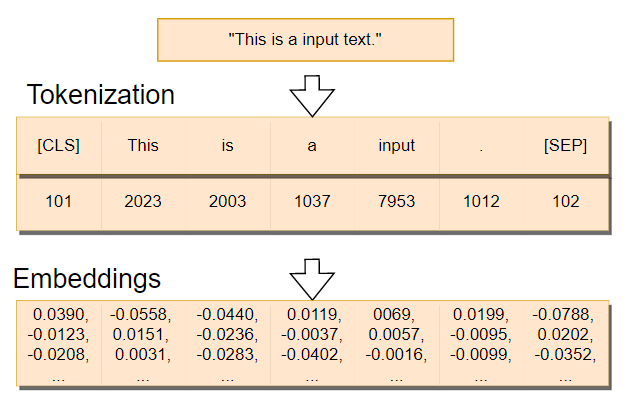

## [Padding](https://wikidocs.net/83544)
- 자연어 처리를 하다보면 각 문장(또는 문서)은 서로 길이가 다를 수 있습니다.
- 그런데 기계는 길이가 전부 동일한 문서들에 대해서는 하나의 행렬로 보고, 한꺼번에 묶어서 처리할 수 있습니다.
- 다시 말해 병렬 연산을 위해서 여러 문장의 길이를 임의로 동일하게 맞춰주는 작업이 필요할 때가 있습니다.

예시) 가장 긴 단어의 길이가 10인 경우....
> - good -> [1,11,11,2] (인코딩) -> [1,11,11,2,0,0,0,0,0,0] (패딩)
> - mountain -> [3,11,4,5,6,7,8,9] (인코딩) -> [3,11,4,5,6,7,8,9,0,0] (패딩)

# Similarity(유사도)

### [Euclidean Similarity(유클리드 유사도)](https://wikidocs.net/24654)
- 유클리디안 유사도는 가장 기본적인 거리를 측정하는 유사도 공식입니다.
- 일반적으로 L2 distance라고 합니다.

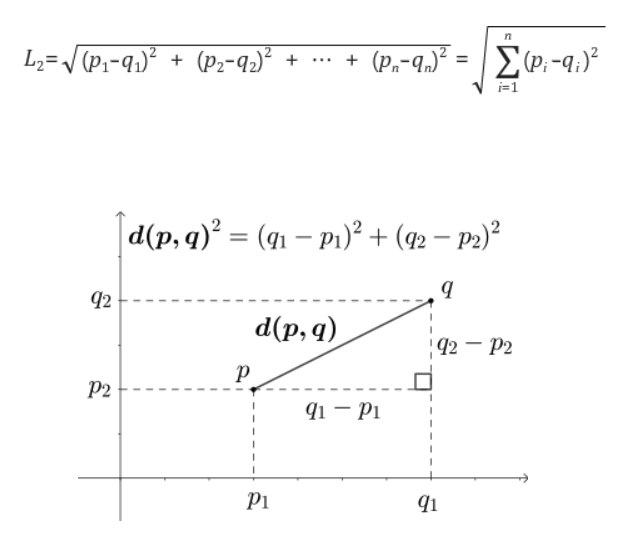

### [Cosine Similarity(코사인 유사도)](https://wikidocs.net/24603)

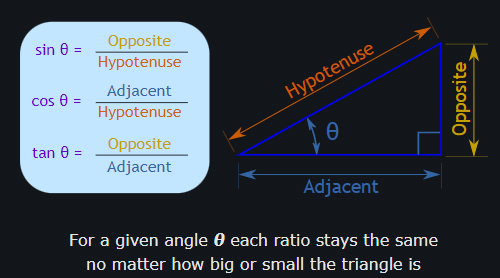

- 코사인 유사도는 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도를 의미합니다.
- 두 벡터의 방향이 완전히 동일한 경우에는 1의 값을 가지며, 90°의 각을 이루면 0, 180°로 반대의 방향을 가지면 -1의 값을 갖게 됩니다.
- 즉, 결국 코사인 유사도는 -1 이상 1 이하의 값을 가지며 값이 1에 가까울수록 유사도가 높다고 판단할 수 있습니다.
- 이를 직관적으로 이해하면 두 벡터가 가리키는 방향이 얼마나 유사한가를 의미합니다.

> - 코사인 유사도가 180°인 경우, -1
> - 코사인 유사도가 90°인 경우, 0
> - 코사인 유사도가 0°인 경우, 1

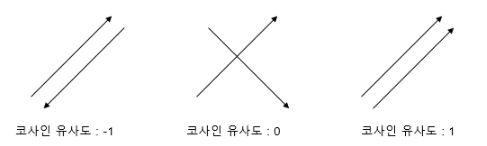

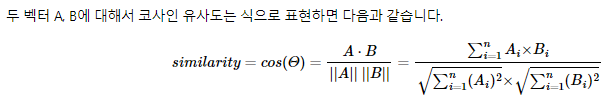

A = [1,1,0], B = [1,0,-1] 인 경우,
코사인 유사도 =
(1\*1 + 1\*0 + 0\*1) / ( $\sqrt{(1^2 + 1^2 + 0^2)}$ * $\sqrt{(1^2 + 0^2 + -1^2)}$  =
1 / 2 = 0.5
